In [1]:
import pandas as pd
import numpy as np
df_train = pd.read_csv('twitter_training.csv', index_col = False)
df_val = pd.read_csv('twitter_validation.csv', index_col = False)
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:
df_train.columns = ['social', 'Entity', 'Sentiment', 'Content']
df_val.columns = ['social', 'Entity', 'Sentiment', 'Content']
df_train
df_val

,social,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
def convert(length):
    length = str(length)
    return length

df_train['Content'] = df_train['Content'].apply(convert)
df_val['Content'] = df_train['Content'].apply(convert)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   social     74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
# training data feature
tweet_train = df_train["Content"]
# valiation data feature
tweet_valid = df_val["Content"]
# training data output value
target_train = df_train['Sentiment']
# validation data output value
target_valid = df_val['Sentiment']
np_target_train = np.array(target_train)
classes = np.unique(np_target_train)

In [5]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~')
tokenizer.fit_on_texts(tweet_train)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1



In [6]:
maxLen = 50
# for i in tweet_train:
#     maxLen = max(maxLen, len(i))
tweet_train_sequences = tokenizer.texts_to_sequences(tweet_train)
tweet_train_sequences = tf.keras.preprocessing.sequence.pad_sequences(tweet_train_sequences, maxlen = maxLen, padding = 'post')




In [7]:

tweet_valid_sequences = tokenizer.texts_to_sequences(tweet_valid)
tweet_valid_sequences = tf.keras.preprocessing.sequence.pad_sequences(tweet_valid_sequences, maxlen = maxLen, padding='post')
print(maxLen)

50


In [8]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

label = LabelEncoder()
one_hot = OneHotEncoder(sparse_output=False)
classes_encoded = label.fit_transform(classes)
classes_encoded = classes_encoded.reshape(len(classes_encoded), 1)
one_hot.fit(classes_encoded)

endcoded_train = label.fit_transform(target_train)
endcoded_val = label.fit_transform(target_valid)

endcoded_train = endcoded_train.reshape(len(endcoded_train), 1)
endcoded_val = endcoded_val.reshape(len(endcoded_val), 1)
endcoded_val = one_hot.transform(endcoded_val)
endcoded_train = one_hot.transform(endcoded_train)






In [9]:
import numpy as np
embeddings_index={}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [11]:
max_num_words = 1000
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
num_words = min(max_num_words, len(word_index))+1
embedding_dim=len(embeddings_index['the'])
embedding_matrix = np.random.normal(emb_mean, emb_std, (num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_num_words:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
import numpy as np
# embedding_dim = int(100)
# embeddings_matrix = np.zeros(len(word_index) + 1, embedding_dim)
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         embeddings_matrix[i] = embedding_vector




c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Input, Dropout, LSTM, Activation, Embedding
model = Sequential()
# model.add(tf.keras.layers.Embedding(num_words, 100, trainable=False,input_length=tweet_train_sequences.shape[1], weights=[embedding_matrix]))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True, recurrent_dropout=0.1, dropout=0.1), 'concat'))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.LSTM(256, return_sequences=False, recurrent_dropout=0.1, dropout=0.1))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(50, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(classes.shape[0], activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.add(tf.keras.layers.Embedding(len(word_index) + 1, 100, trainable=False,input_length=maxLen, weights=[embedding_matrix]))
model.add(tf.keras.layers.LSTM(128, return_sequences=False, recurrent_dropout=0.3, dropout=0.2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [14]:
history = model.fit(tweet_train_sequences, endcoded_train, epochs = 15,
          batch_size = 128, shuffle=True,
          validation_data=[tweet_valid_sequences, endcoded_val])

Epoch 1/15
584/584 [==============================] - ETA: 0s - loss: 1.3682 - acc: 0.2992WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'tuple'> input: (<tf.Tensor 'IteratorGetNext:0' shape=(None, 50) dtype=int32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 4) dtype=float32>)
Consider rewriting this model with the Functional API.


AttributeError: in user code:

    File "c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\akash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 1598, in dtype
        return x.dtype.base_dtype.name

    AttributeError: Exception encountered when calling layer 'embedding' (type Embedding).
    
    'tuple' object has no attribute 'dtype'
    
    Call arguments received by layer 'embedding' (type Embedding):
      • inputs=('tf.Tensor(shape=(None, 50), dtype=int32)', 'tf.Tensor(shape=(None, 4), dtype=float32)')


In [ ]:
print("Training features:",tweet_train_sequences.shape)
print("Training labels:", endcoded_train.shape)
print("Validation labels:", endcoded_val.shape)
print(type(tweet_train_sequences))
tweet_valid_sequences = np.array(tweet_valid_sequences)
print("Validation features:",tweet_valid_sequences.shape)

Training features: (74681, 957)
Training labels: (74681, 4)
Validation labels: (999, 4)
<class 'numpy.ndarray'>
Validation features: (999, 957)


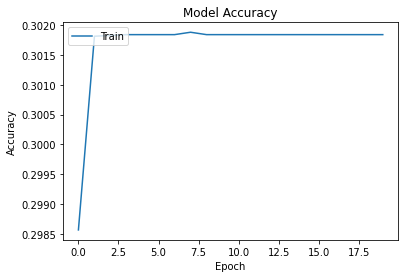

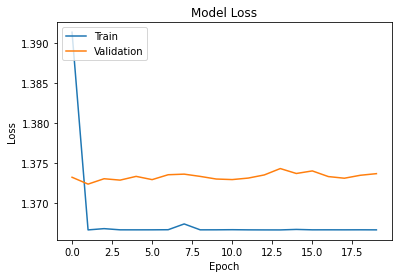

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save('model/sentiment')


INFO:tensorflow:Assets written to: model/sentiment\assets


INFO:tensorflow:Assets written to: model/sentiment\assets


In [ ]:
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# label = LabelEncoder()
# endcoded_train = label.fit_transform(target_train)
# endcoded_val = label.fit_transform(target_valid)

# y_train = tf.keras.utils.to_categorical(endcoded_train)
# y_valid = tf.keras.utils.to_categorical(endcoded_val)

i = "I am feeling negative"
tokenizer.fit_on_texts(i)
token_input = tokenizer.texts_to_sequences(i)
token_input = tf.keras.preprocessing.sequence.pad_sequences(token_input, maxlen = max_num_words, padding = 'post')

out  = model.predict(token_input)
out_score = out[0]
neg_score = out_score[1]
pos_score = out_score[2]
neu_score = out_score[3]




1/1 [==============================] - 1s 897ms/step


array([[0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 , 0.24357827, 0.27930862],
       [0.17393042, 0.3031827 ,